# Lab 4-28-22_Start

## Visualization of Numeric Data

In [1]:
#Source: https://realpython.com/pandas-plot-python/
import pandas as pd

d_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
df = pd.read_csv(d_url)
pd.set_option("display.max.columns", None)
df.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
%matplotlib inline

<AxesSubplot:xlabel='Rank'>

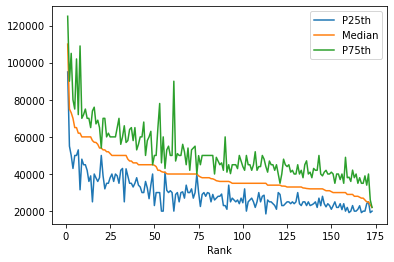

In [3]:
#Show the distribution of earnings graphically
df.plot(x="Rank", y=["P25th", "Median", "P75th"])


<AxesSubplot:ylabel='Frequency'>

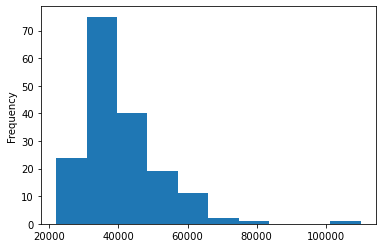

In [4]:
#Survey your data by creating a histogram for the median column
median_column=df['Median']
median_column.plot(kind='hist')

<AxesSubplot:xlabel='Major'>

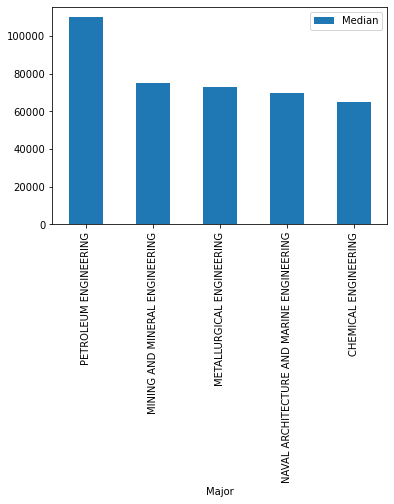

In [8]:
#Analysis of outliers (top 5 values) in Median column
top_5= df.sort_values(by="Median", ascending=False).head()
top_5.plot(x='Major', y='Median', kind='bar', fontsize=10)

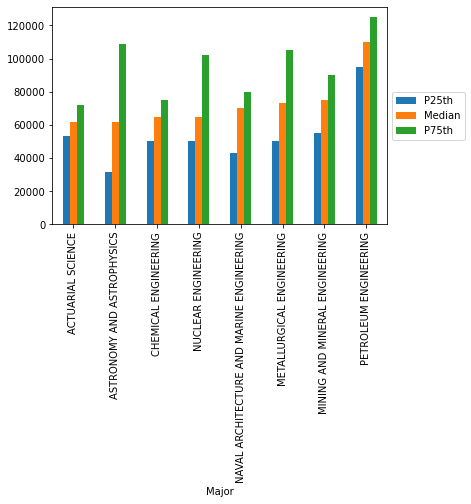

In [13]:
#Which are the majors whose median salary is above $60,000?
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x='Major', y=["P25th",'Median',"P75th"], kind='bar').legend(loc='center left', bbox_to_anchor=(1, 0.5))


<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

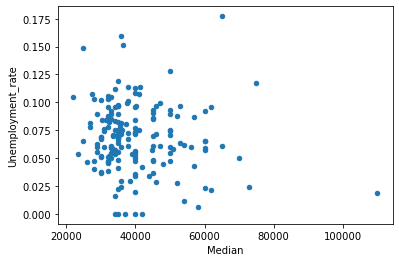

In [14]:
#Compare the median salary with unemployement-rate 
#Is there a noticeable pattern between these two?
df.plot(x="Median", y="Unemployment_rate",kind="scatter")

<AxesSubplot:ylabel='Major_category'>

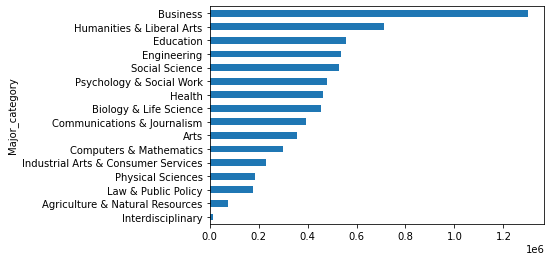

In [17]:
#Analyze categorical data by grouping
#With .groupby(), you create a DataFrameGroupBy object and 
#with .sum(), you create a Series.
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals
cat_totals.plot(kind="barh", fontsize=10)

<AxesSubplot:>

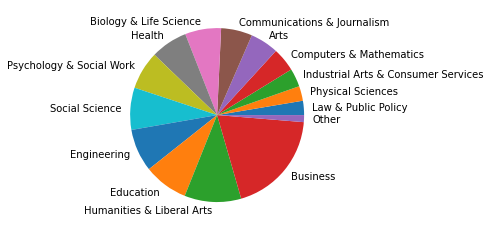

In [20]:
#Then create a pie chart to visualize ratios
#Lump smaller categories (with a total under 100K) into "Other"
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

<AxesSubplot:ylabel='Frequency'>

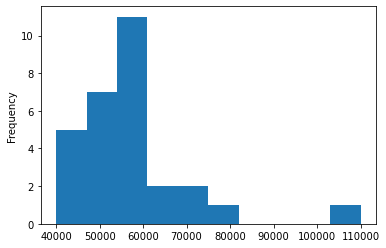

In [21]:
#Analyze the distribution of data within a category (e.g. Engineering)
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

# GeoVisualization

In [22]:
#Source: https://www.learnpythonwithrune.org/3-steps-to-plot-shooting-incident-in-ny-on-a-map-using-python/

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Data/CUNYColleges.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               25 non-null     object 
 1   Borough            25 non-null     object 
 2   Founded            25 non-null     int64  
 3   Type               25 non-null     object 
 4   Address            25 non-null     object 
 5   City               25 non-null     object 
 6   State              25 non-null     object 
 7   Zipcode            25 non-null     int64  
 8   Enrollment (2019)  24 non-null     object 
 9   Male/Female        24 non-null     object 
 10  Website            25 non-null     object 
 11  FullAddress        25 non-null     object 
 12  lat                25 non-null     float64
 13  lon                25 non-null     float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.9+ KB


,Name,Borough,Founded,Type,Address,City,State,Zipcode,Enrollment (2019),Male/Female,Website,FullAddress,lat,lon
0,Baruch College,Manhattan,1968,Senior,55 Lexington Avenue,New York,NY,10010,"18,679",48%/52%,https://www.baruch.cuny.edu/,"55 Lexington Avenue, New York, NY, 10010",40.709531,-73.679099
1,Borough of Manhattan Community College,Manhattan,1963,Junior,199 Chambers Street,New York,NY,10007,"25,550",43%/57%,https://www.bmcc.cuny.edu/,"199 Chambers Street, New York, NY, 10007",40.716872,-74.012001
2,Bronx Community College,The Bronx,1957,Junior,2155 University Avenue,Bronx,NY,10453,"10,040",44%/56%,http://www.bcc.cuny.edu/,"2155 University Avenue, Bronx, NY, 10453",40.857685,-73.912896
3,Brooklyn College,Brooklyn,1930,Senior,2900 Bedford Ave,Brooklyn,NY,11210,"17,811",42%/58%,http://www.brooklyn.cuny.edu/web/home.php,"2900 Bedford Ave, Brooklyn, NY, 11210",40.631068,-73.951987
4,College of Staten Island,Staten Island,1976,Senior,2800 Victory Boulevard,Staten Island,NY,10314,"12,782",44%/56%,https://www.csi.cuny.edu/,"2800 Victory Boulevard, Staten Island, NY, 10314",40.604053,-74.149023
5,Craig Newmark Graduate School of Journalism,Manhattan,2006,Graduate,219 W 40th Street,New York,NY,10018,232,35%/65%,https://www.journalism.cuny.edu/,"219 W 40th Street, New York, NY, 10018",40.755325,-73.988988
6,CUNY Graduate Center,Manhattan,1961,Graduate,365 Fifth Avenue,New York,NY,10016,"3,603",43%/57%,https://www.gc.cuny.edu/,"365 Fith Avenue, New York, NY, 10016",42.709681,-73.710822
7,CUNY Graduate School of Public Health & Health...,Manhattan,2008,Graduate,55 W 125th Street,New York,NY,10027,746,27%/73%,https://sph.cuny.edu/,"55 W 125th Street, New York, NY, 10027",40.807322,-73.943967
8,CUNY School of Labor and Urban Studies,Manhattan,2018,Graduate,25 West 43rd Street,New York,NY,10036,364,37%/63%,https://slu.cuny.edu/,"25 West 43rd Street, New York, NY, 10036",40.754875,-73.981710
9,CUNY School of Law,Queens,1983,Graduate,2 Court Square,Long Island City,NY,11101,626,39%/61%,https://www.law.cuny.edu/index.html,"2 Court Square, Long Island City, NY, 11101",40.746837,-73.943259


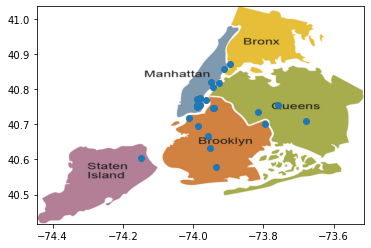

In [23]:
#Relabeling the columns of the dataframe
longitude = df['lon']
latitude = df['lat']

# The boundaries of the image map
map_box = [-74.4461, -73.5123, 40.4166, 41.0359]

#Getting the map ready from the file with the image
map_img = plt.imread('Data/nyc_map.png')

#Code to plot each entry on the map
fig, ax = plt.subplots()
ax.scatter(longitude, latitude)
ax.set_ylim(map_box[2], map_box[3])
ax.set_xlim(map_box[0], map_box[1])
ax.imshow(map_img, extent=map_box, alpha=0.9)

#Saving the new figure and showing the map
#plt.savefig('Data/nyc_map_mod1.png')
plt.show()